# Dataset Inspection

## Dependencies

In [ ]:
pip install pandas matplotlib seaborn

## Electricity Consumption

Let's first load data and see what are some entries looking like.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

electricity_consumption = pd.read_csv('electricity_consumption/train.csv')

electricity_consumption.head()

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,1,2016-01-01 00:00:00,0.0,Education,2720,2004,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,2,2016-01-01 00:00:00,0.0,Education,5376,1991,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,3,2016-01-01 00:00:00,0.0,Education,23685,2002,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,4,2016-01-01 00:00:00,0.0,Education,116607,1975,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,5,2016-01-01 00:00:00,0.0,Education,8000,2000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


Now let's plot a histogram for the meter_reading column.

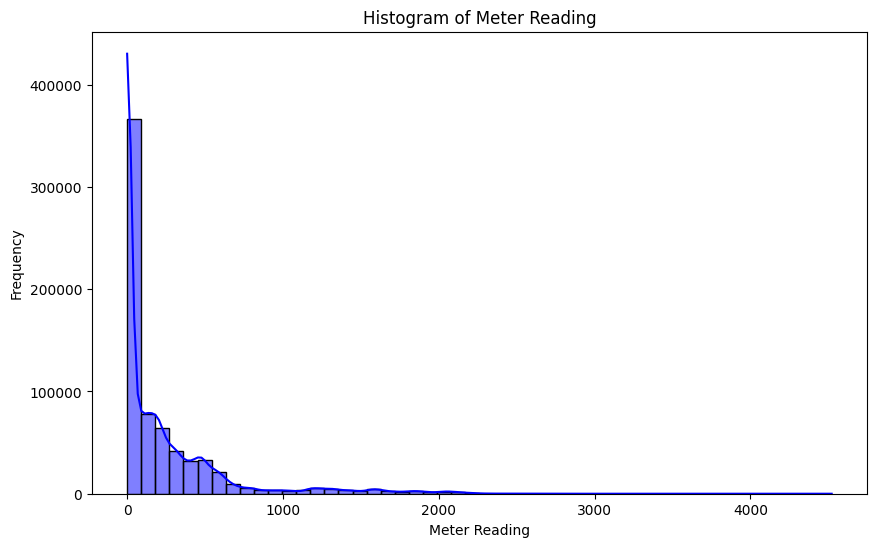

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(electricity_consumption['meter_reading'], bins=50, kde=True, color='blue')
plt.title('Histogram of Meter Reading')
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')
plt.show()


Also good to check out the numerical values:

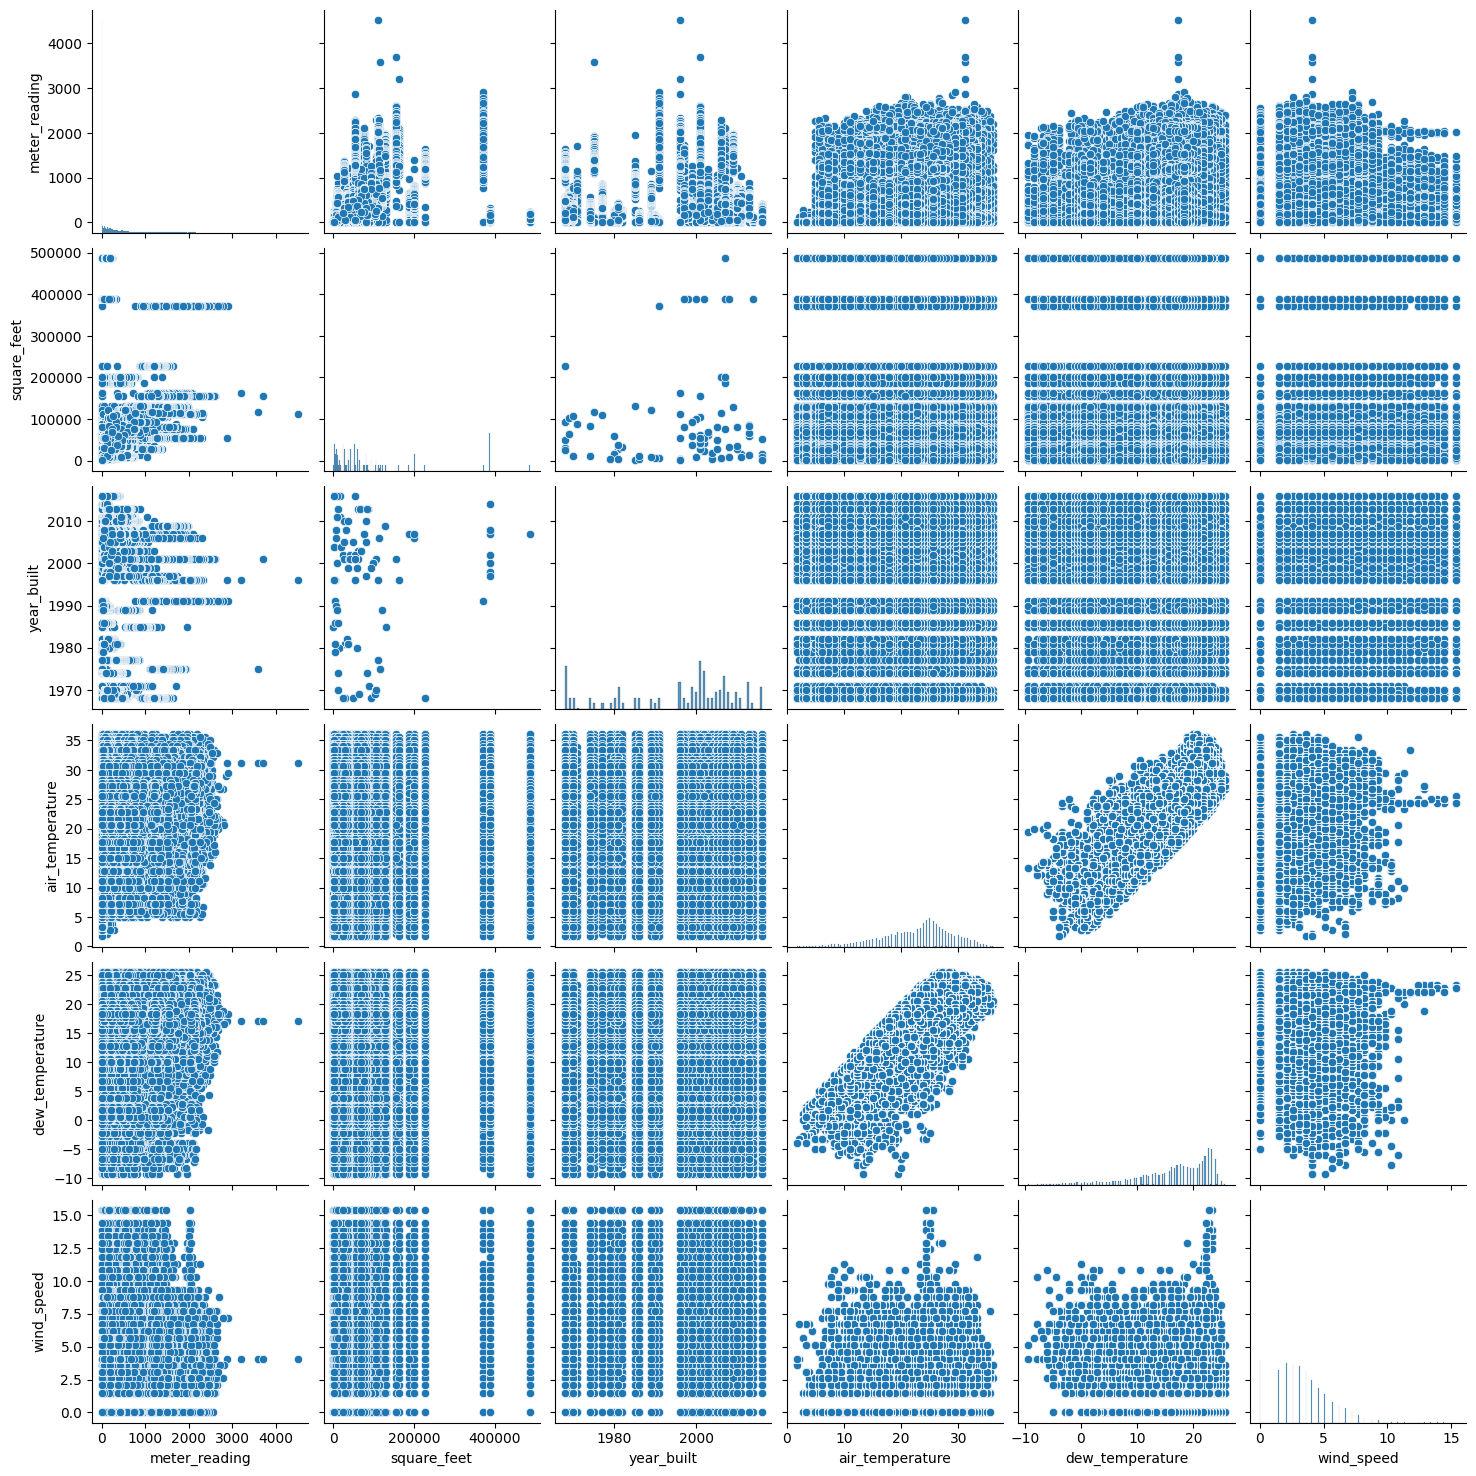

In [6]:
sns.pairplot(electricity_consumption[['meter_reading', 'square_feet', 'year_built', 'air_temperature', 'dew_temperature', 'wind_speed']])
plt.show()


Finally, I also want to check out correlations.

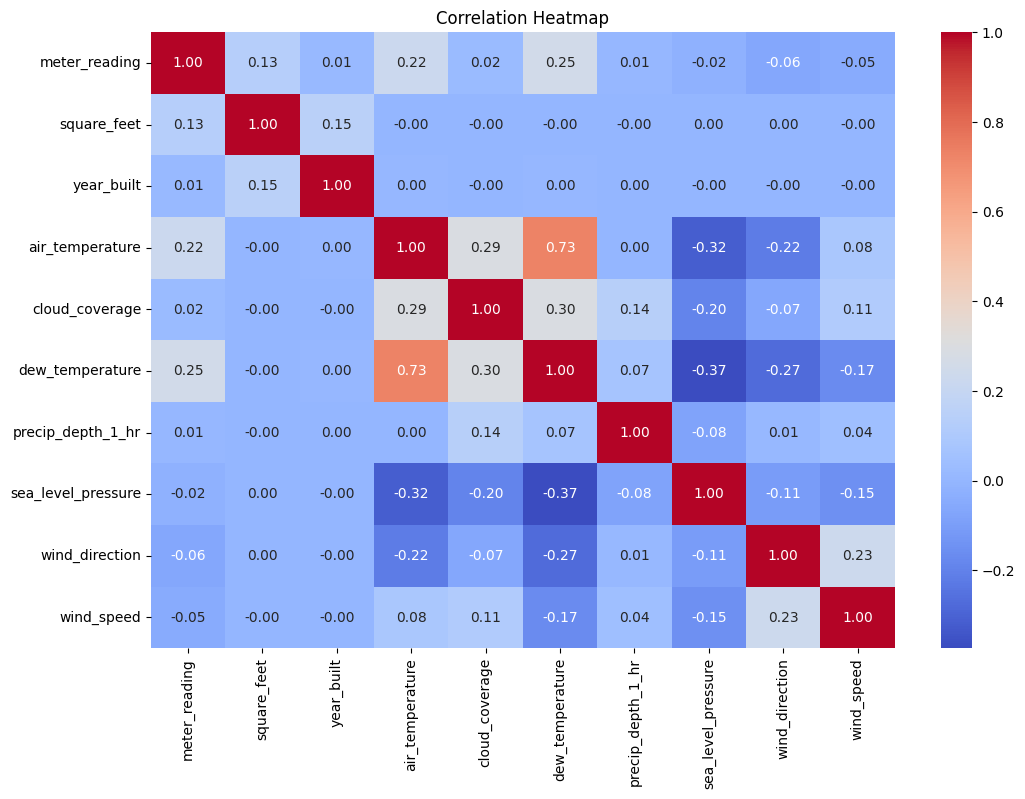

In [21]:
numeric_cols = electricity_consumption.drop(columns=['building_id']).select_dtypes(include=['float64', 'int64'])
# numeric_cols = energy_anomaly.drop(columns=['building_id', 'site_id']).select_dtypes(include=['float64', 'int64'])

corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Energy Anomaly Detection

Now let's do something similar to the other dataset.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

energy_anomaly = pd.read_csv('energy_anomaly_detection/train_features.csv')

energy_anomaly.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


Firstly, let's check the meter readings.

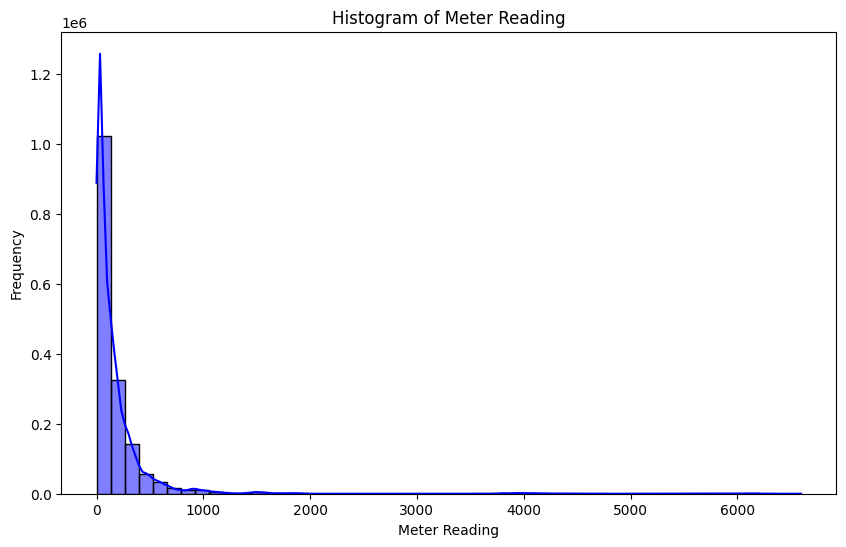

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(energy_anomaly['meter_reading'], bins=50, kde=True, color='blue')
plt.title('Histogram of Meter Reading')
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')
plt.show()


Pair plots to see what are the relationships of the different attributes.

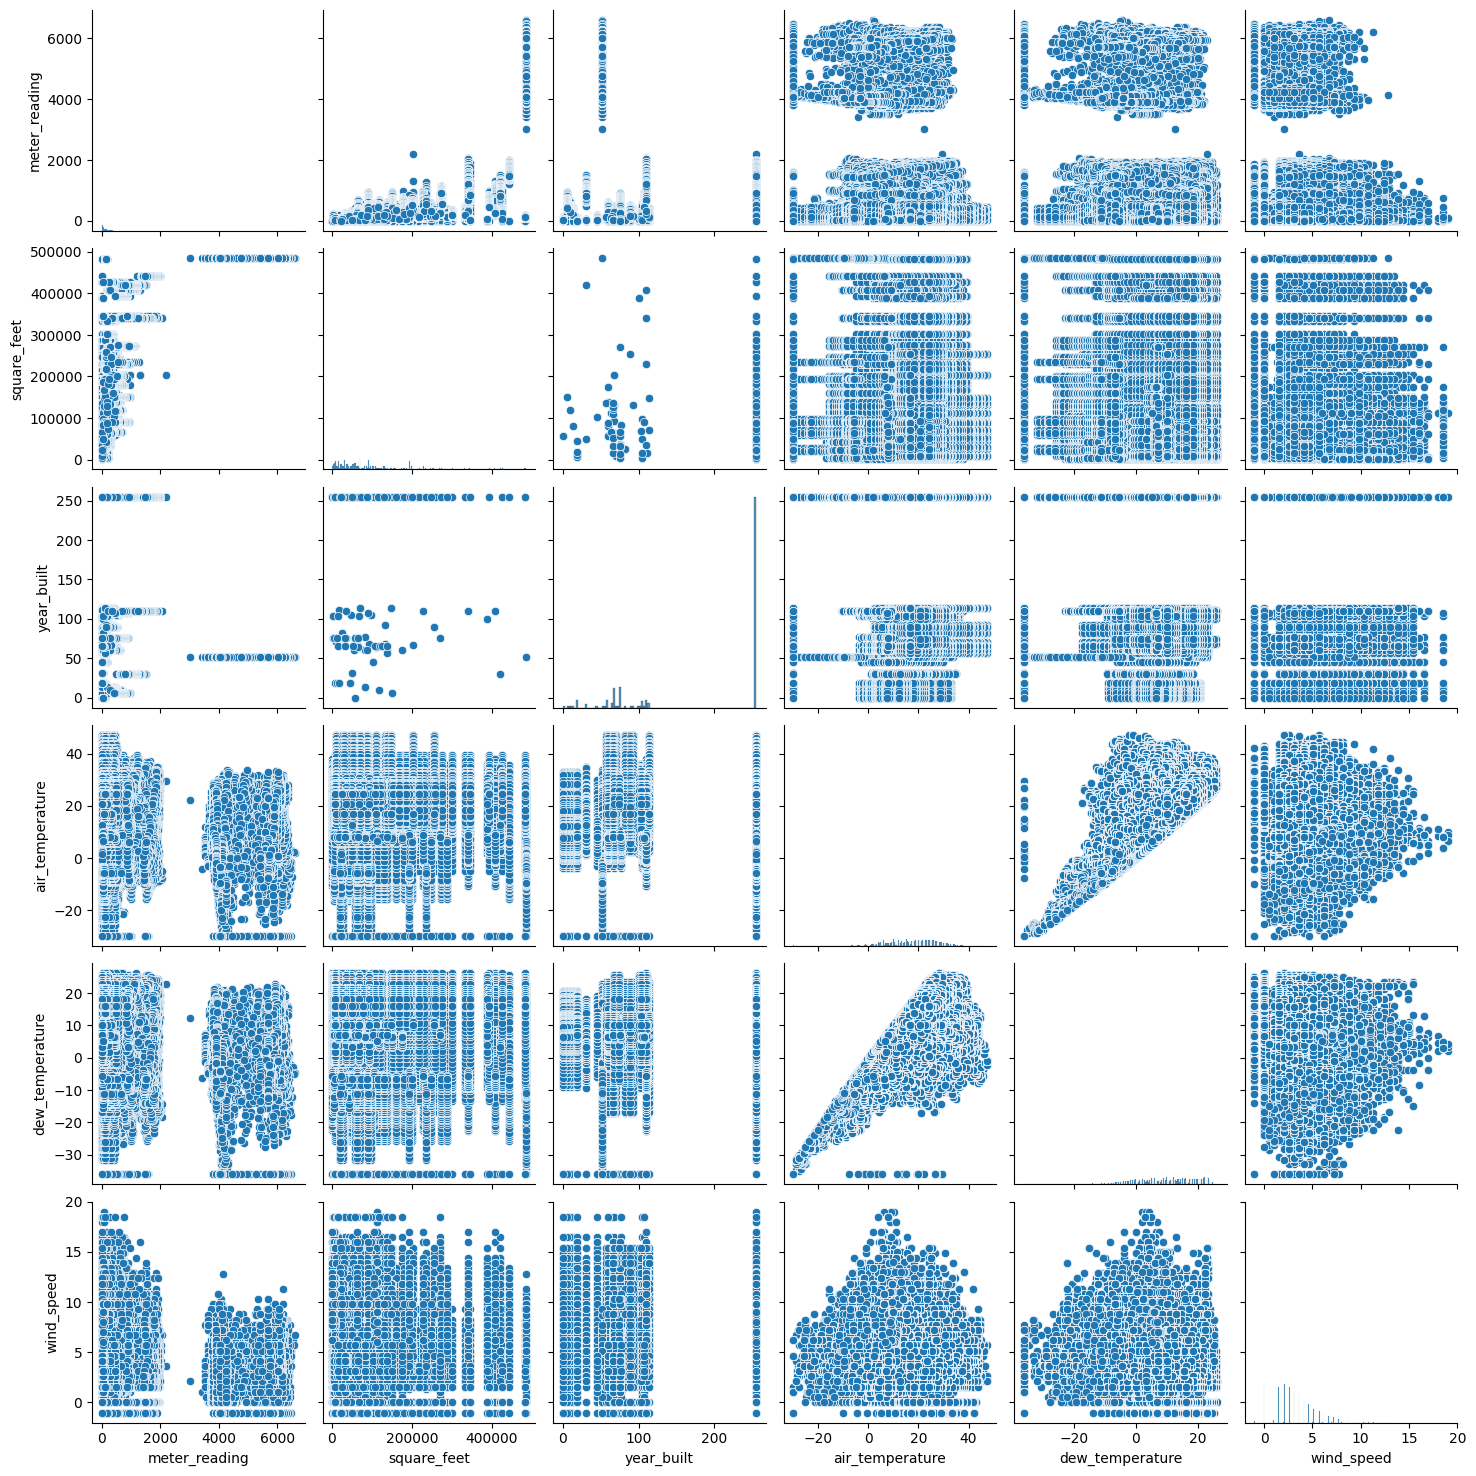

In [12]:
sns.pairplot(energy_anomaly[['meter_reading', 'square_feet', 'year_built', 'air_temperature', 'dew_temperature', 'wind_speed']])
plt.show()


Now let's check correlations.

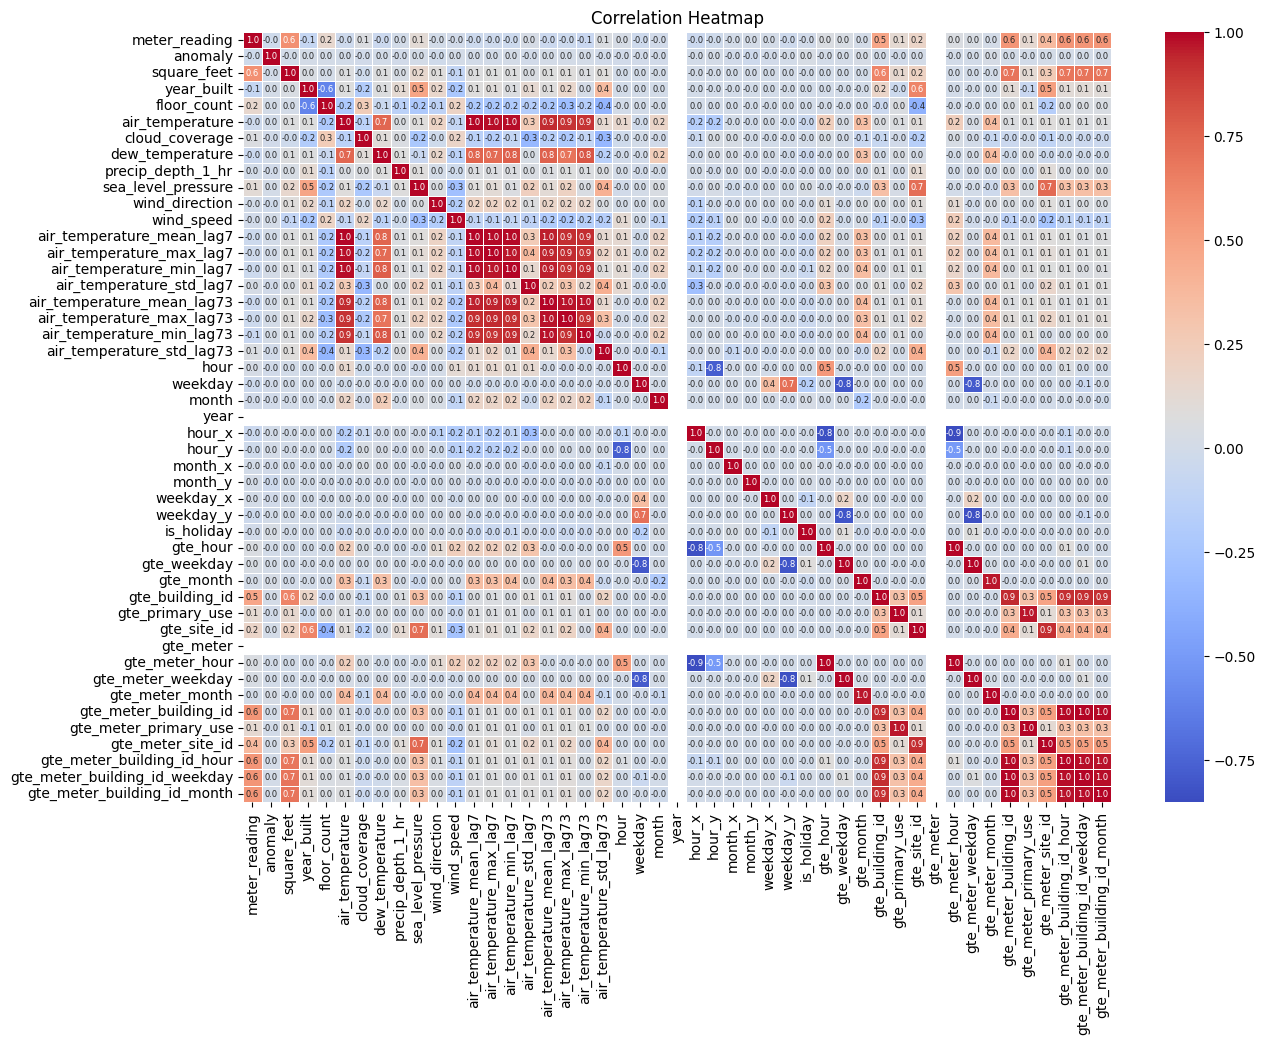

In [18]:
numeric_cols = energy_anomaly.drop(columns=['building_id', 'site_id']).select_dtypes(include=['float64', 'int64'])

corr = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 6}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Feature Extraction

## Electricity Consumption


I'm personally not too familiar with energy consumption, so I will choose features based on their importance by calculating it with, firstly, finding out correlation and then applying then using Random Forest with those features with the target of meter_reading to get the proper score.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

electricity_consumption = pd.read_csv('electricity_consumption/train.csv')

X = electricity_consumption.drop(columns=['meter_reading', 'timestamp', 'primary_use','building_id'])
X.fillna(X.mean(), inplace=True)

y = electricity_consumption['meter_reading']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)


Visualizing the result.

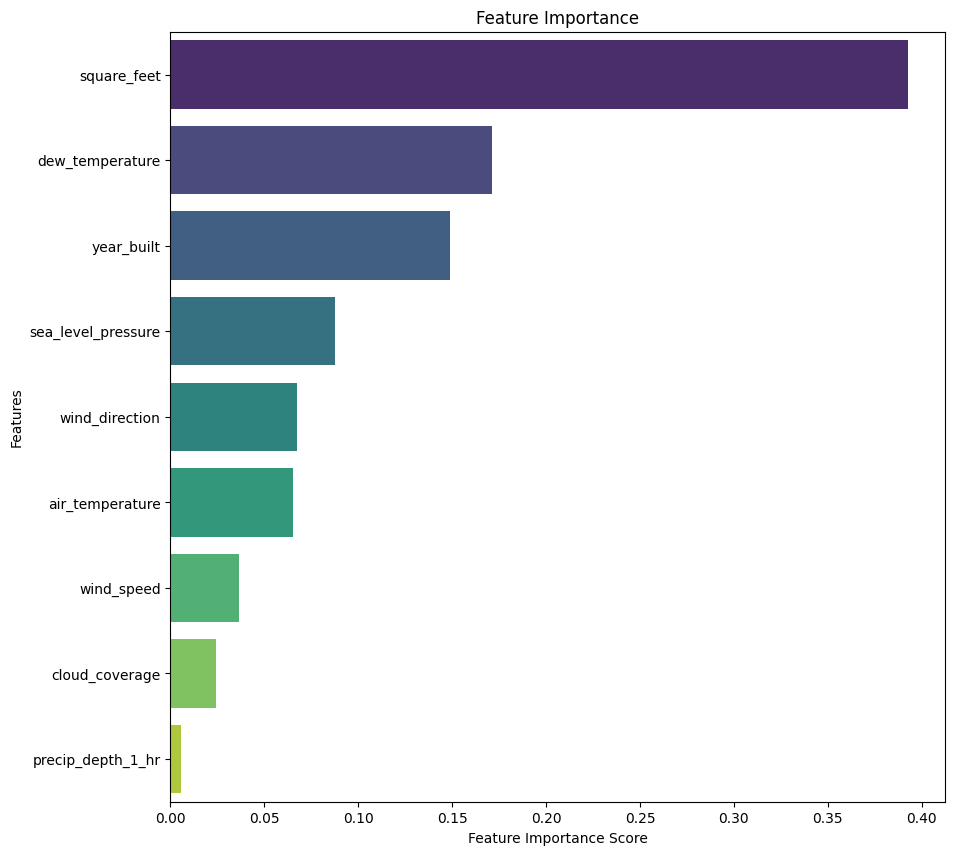

In [35]:
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances, y=feature_importances.index, hue = feature_importances.index, palette='viridis', legend=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## Energy Anomaly Detection

I'm going to separate things a bit since data is quite large.

In [36]:
import pandas as pd

energy_anomaly = pd.read_csv('energy_anomaly_detection/train_features.csv')


Let's also remove some irrelevant features like building and site ids.

In [37]:
energy_anomaly.drop(columns=['building_id', 'site_id', 'timestamp'], inplace=True)

Now let's also determine correlation between features.

In [39]:
non_numeric_columns = energy_anomaly.select_dtypes(exclude=['float64', 'int64']).columns
energy_anomaly_numeric = energy_anomaly.drop(columns=non_numeric_columns)

corr_matrix = energy_anomaly_numeric.corr()

Now let's extract the relevant features. This dataset is larger and contains some missing data, so I'm using imputation to deal with them.

In [42]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_imputed, y)

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

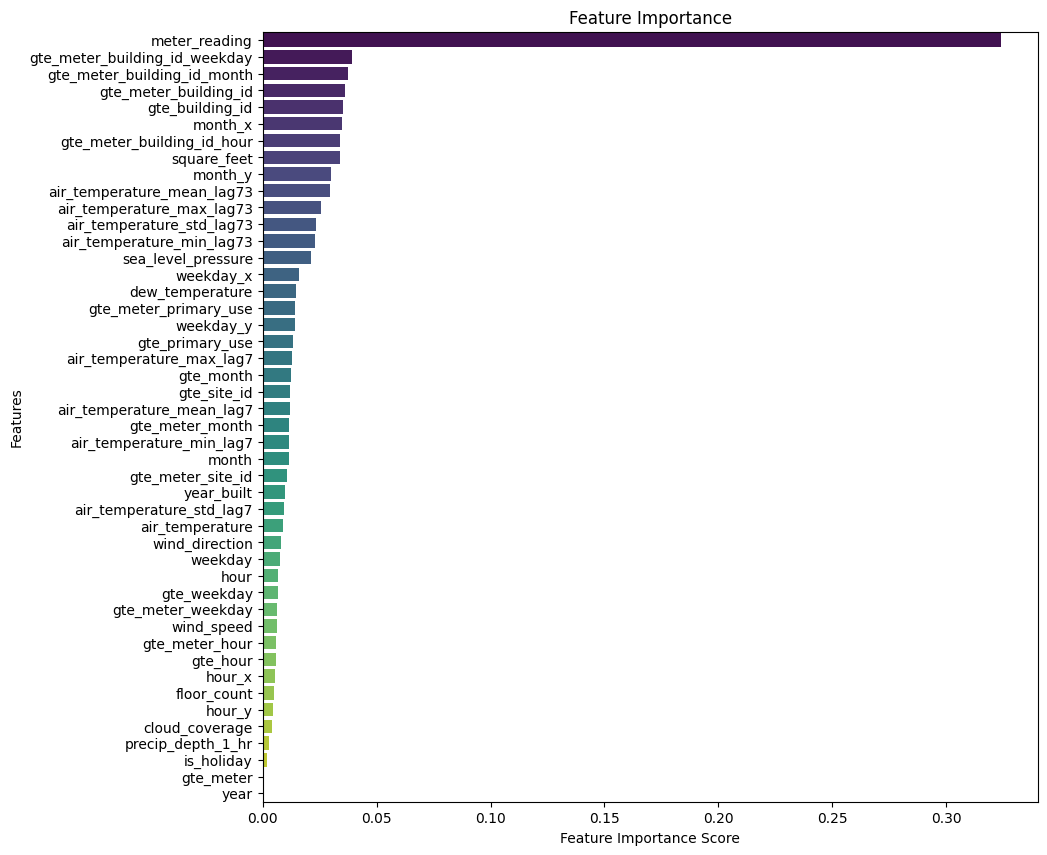

In [45]:
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances, y=feature_importances.index,hue=feature_importances.index, palette='viridis', legend=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()